1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [ ]:
import numpy as np

m = np.arange(12).reshape((3,4))
print(m, '\n')
print('total mean :', m.mean())
print('mean along columns :', m.mean(axis=0))
print('mean along rows :', m.mean(axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

total mean : 5.5
mean along columns : [4. 5. 6. 7.]
mean along rows : [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [ ]:
# using outer function
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
pr=np.outer(u, v)
print(pr)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [ ]:
# using a nested for loop or a list comprehension
prd =np.array([list(x*v) for x in u])
print(prd)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [ ]:
#Using numpy broadcasting operations
prod_broad = np.tile(u,(len(v),1)).T * v
print(prod_broad)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [ ]:
import numpy.random as npr
npr.seed(5671)
m=npr.rand(10, 6)*3
print('matrix :', '\n', m, '\n')

#mask = (m<0.3)
m[m<0.3]=0
print('masked m :','\n', m)


matrix : 
 [[0.52444223 1.13451983 2.84675008 2.44701348 1.20544589 2.5437359 ]
 [1.01741222 2.61157548 1.1438237  0.78401212 1.07597132 1.66323167]
 [1.84103153 1.33567742 1.68892383 1.03514312 0.71384489 1.1839534 ]
 [1.16206567 0.42422992 2.55295809 1.35486175 0.23267727 2.64159045]
 [2.19347341 1.30208673 0.71600251 1.18441085 0.80268199 2.10662054]
 [0.25246911 1.90080012 1.47925473 1.50171628 0.53957355 1.44541264]
 [0.63887672 0.18868897 1.35492943 1.29931659 2.45679556 0.83197327]
 [2.429426   0.41243367 0.17698294 1.61365831 1.66401788 0.51440787]
 [0.91448843 2.10434451 1.44167778 2.48440953 2.26209099 1.75384224]
 [2.86142458 2.45139993 1.1538194  1.02945234 2.84550369 2.97943054]] 

masked m : 
 [[0.52444223 1.13451983 2.84675008 2.44701348 1.20544589 2.5437359 ]
 [1.01741222 2.61157548 1.1438237  0.78401212 1.07597132 1.66323167]
 [1.84103153 1.33567742 1.68892383 1.03514312 0.71384489 1.1839534 ]
 [1.16206567 0.42422992 2.55295809 1.35486175 0.         2.64159045]
 [2.193

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

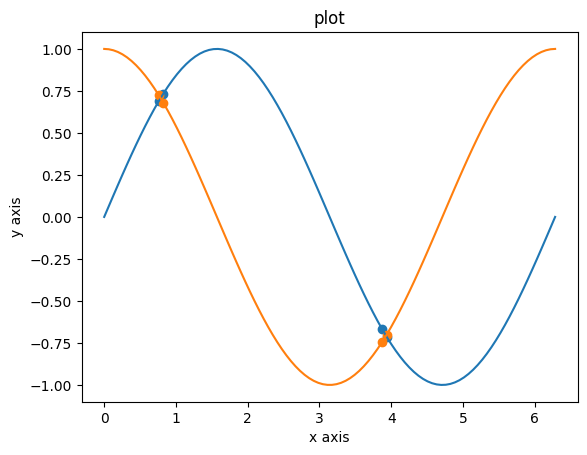

In [ ]:
import math
from matplotlib import pyplot as plt
l = np.linspace(0, 2*math.pi, 100)
#la = l.reshape(10, 10)
print(l, '\n')

l_slice = l[10:101:10]
print('extracted elements: ',l_slice, '\n')
reversed_arr = l[::-1]
print('reversed array: ',reversed_arr)
abs_array = l[np.absolute(np.cos(l)-np.sin(l))<0.1]
print('elements where absolute difference of sin and cos is less than 0.1: ',abs_array)



plt.title("plot")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(l,np.sin(l),l,np.cos(l) )
plt.scatter(abs_array,np.sin(abs_array))
plt.scatter(abs_array,np.cos(abs_array))

plt.show()

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [ ]:
r = np.arange(1, 11)
mult_table = r*r[:, None]
print(mult_table, '\n')

print(' trace of the matrix :', mult_table.trace(), '\n')

anti_diag = np.fliplr(mult_table).diagonal()
print(' anti-diagonal matrix :', anti_diag, '\n')

diag = mult_table.diagonal(1)
print('diagonal offset by 1 upwards :', diag)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

 trace of the matrix : 385 

 anti-diagonal matrix : [10 18 24 28 30 30 28 24 18 10] 

diagonal offset by 1 upwards : [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [ ]:
row = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
grid = np.absolute(row-row[:,None])
print('grid of distances :', '\n', grid, '\n')

km_grid = np.round(grid*1.60934)
print('grid of distances in KM :', '\n', km_grid)

grid of distances : 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

grid of distances in KM : 
 [[   0.  319.  488. 1184. 1402. 1891. 2374. 2485. 3079. 3940.]
 [ 319.    0.  169.  866. 1083. 1572. 2055. 2166. 2760. 3621.]
 [ 488.  169.    0.  697.  914. 1403. 1886. 1997. 2591. 3452.]
 [1184.  866.  697.    0.  217.  707. 1189. 1300. 1894. 2755.]
 [1402. 1083.  914.  217.    0.  489.  972. 1083. 1677. 2538.]
 [1891. 1572. 1403.  707.  489.    0.  483.  594. 1188. 2049.]
 [2374. 2055. 1886. 1189.  972.  483.  

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [ ]:
def primeNumbers(n):
  mask = [True for _ in range(n+1)]
  mask[0] = mask[1] = False

  m=2
  for m in range(2, n):
    if (mask[m]==True) :
      for m in range(m * m, n+1, m):
        mask[m] = False
  m += 1
  return np.arange(0,n+1)[mask]

print(primeNumbers(100))

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

[[-1 -1 -1 ...  1  1 -1]
 [-1  1 -1 ...  1  1  1]
 [-1  1 -1 ... -1  1 -1]
 ...
 [-1 -1 -1 ... -1  1  1]
 [ 1  1 -1 ... -1  1 -1]
 [-1  1 -1 ...  1  1 -1]] 

distance in each step [[ -1  -2  -3 ...   0   1   0]
 [ -1   0  -1 ...   6   7   8]
 [ -1   0  -1 ... -24 -23 -24]
 ...
 [ -1  -2  -3 ...  10  11  12]
 [  1   2   1 ...  -8  -7  -8]
 [ -1   0  -1 ... -22 -21 -22]] 

square of previously obtained array [[  1   4   9 ...   0   1   0]
 [  1   0   1 ...  36  49  64]
 [  1   0   1 ... 576 529 576]
 ...
 [  1   4   9 ... 100 121 144]
 [  1   4   1 ...  64  49  64]
 [  1   0   1 ... 484 441 484]]
mean square of each step [  1.      2.056   2.992   3.82    4.76    5.732   6.6     7.488   8.36
   9.292  10.184  11.388  12.584  13.212  14.392  15.752  17.256  18.348
  19.584  20.364  21.416  21.976  22.88   23.776  24.712  25.26   25.68
  26.428  26.576  27.484  28.712  30.196  30.912  32.48   33.232  33.344
  34.16   35.884  36.704  37.42   38.464  40.08   41.608  42.892  43.688
  44.776  

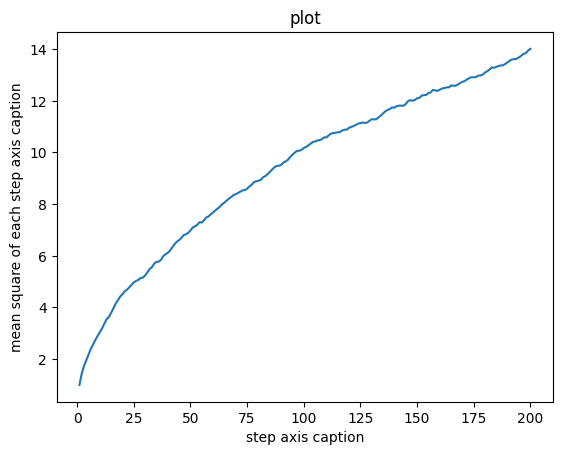

In [ ]:
import numpy.random as npr
from matplotlib import pyplot as plt
w = 1000
s = 200
arr = npr.randint(-1, 1, size=(w,s))
arr[arr==0] = 1
print(arr, '\n')

# sm = arr.sum(axis=1)
for i in range(1,s):
  arr[:,i] = arr[:,i] + arr[:,i-1]

print('distance in each step',arr, '\n')
sqr = arr*arr
print('square of previously obtained array',sqr)
mean_steps = sqr.mean(axis=0)
print('mean square of each step',mean_steps);

radical =np.sqrt(mean_steps)
print('mean square of each step',radical)

x = np.arange(1,s+1)

plt.title("plot")
plt.xlabel("step axis caption")
plt.ylabel("mean square of each step axis caption")
plt.plot(x,radical)
plt.show()
